In [2]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path as path
import wget

In [4]:
file = 'Data/data.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv'
if not path.exists(file):
    Path_ = wget.download(url,file)
else:
    Path_ = file

In [7]:
Data = pd.read_csv(Path_,sep=',')
x = np.float64(Data['x'])
y = np.float64(Data['y'])
n = Y.size
h = 0.01

In [8]:
def fun(x, t0,t1,t2):
    
    res = t0/ (t1 + np.exp(-t2*x))
    
    return res

In [31]:
def costo(x,y, t1,t2,t3):
    chi = 0
    
    for i in range(n):
        chi += (y[i] - fun(x[i],t1,t2,t3))**2
    return chi 

In [32]:
def Derivadas(x,y,t0,t1,t2):
    J = np.zeros(3)
    
    J[0] = ( costo(x,y,t0+h,t1,t2) - costo(x,y,t0-h,t1,t2))/(2*h)
    J[1] = ( costo(x,y,t0,t1+h,t2) - costo(x,y,t0,t1-h,t2))/(2*h)
    J[2] = ( costo(x,y,t0,t1,t2+h) - costo(x,y,t0,t1,t2-h))/(2*h)
    return J

In [45]:
def Descenso( teta, lr, itmax, error):
    it = 0
    d = 1
    while d > error and it < itmax:
        x0 = Derivadas(x,y,teta[0],teta[1],teta[2])
        
        teta = teta - lr*x0
        
        d = np.linalg.norm(teta-optimize.curve_fit(fun,x,y)[0])
        
        it += 1
        

    return teta, d,it


In [46]:
print('Puede demorarse unos segundos...')
teta0 = np.array([1,1,1])
p = Descenso(teta0,5e-4,2e4,1e-2)

t0 = p[0][0]
t1 = p[0][1]
t2 = p[0][2]

chi = costo(x,y,t0,t1,t2)

print('Los puntos que mejor se ajustan al modelo son: \n', str(t0)+'\n',str(t1)+'\n',str(t2)+'\n')
print('\nEl valor del chi cuadrado es: ' + str(chi))
print('\nEl error es de: ' + str(p[1]))
print('\nAdemas el algoritmo hizo un total de: ' + str(p[2]) +' iteraciones')


Puede demorarse unos segundos...
Los puntos que mejor se ajustan al modelo son: 
 4.394141971870481
 0.9737879524137685
 2.789338222493078


El valor del chi cuadrado es: 0.10503710593049193

El error es de: 0.009993015026471529

Ademas el algoritmo hizo un total de: 19946 iteraciones


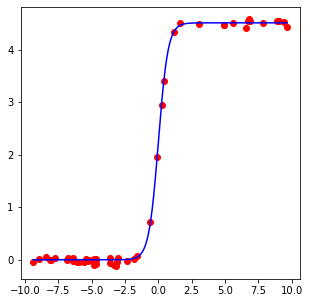

In [49]:
x1 = np.linspace(min(x),max(x),500)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(x,y,c='r')
plt.plot(x1,fun(x1,t0,t1,t2),c='b')